# Problema 1.

Usando el set `PS4_1.csv`, convertir la serie `Date` en el indice (serie de tiempo) y eliminar la serie `Unnamed: 1` (generado por pandas), retornar en una lista y en el siguiente orden:

* cantidad de columnas
* Nombre de las columnas
* número de registros no NaN de cada columna
* cantidad total de memoria usada para cargar el set en el computador ,( df.memory_usage() )
* Estadistica basica para cada columna, media, desviacion estandar, maximo
* Remplazar los NaN por None


# Problema 2

Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019. 


1. Ver la estadistica general del data frame.
2. Dejar las columnas PrimaryType, y Date.
3. Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandaspd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").
4. Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee:
   df.groupby(columna).Date.count()
   
   sort_values()
5. Ordenar los valores por orden alfabetico de Primary type
6. Mostrar de la fila 100 a la 120
6. Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
   ax = sns.barplot(x = "contador", y="Primary Type", data = datos)




# Problema 3

1. Leer el dataset country_vaccinations.csv  y filtrar los datos para Colombia
2. Crear un csv con los datos para colombia
3. Realizar una comparacion con los paises latinoamericanos. 
4. A traves de mascaras determinar el numero de vacunados en el intervalo  [1.5E6, 2.0E6]


In [4]:
import pandas as pd

In [165]:
path = "Data/PS4_1.xls"
df = pd.read_csv(path)

In [166]:
df.head()

,Date,Unnamed: 1,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
0,01/01/2009,00:00,29,20,35,NaN
1,02/01/2009,00:00,19,3,22,NaN
2,03/01/2009,00:00,24,12,22,NaN
3,04/01/2009,00:00,24,8,15,NaN
4,05/01/2009,00:00,120,111,141,NaN


In [167]:
df.pop("Unnamed: 1")
df.pop("Date")
df.head()

,Berri1,Maisonneuve_1,Maisonneuve_2,Brebeuf
0,29,20,35,NaN
1,19,3,22,NaN
2,24,12,22,NaN
3,24,8,15,NaN
4,120,111,141,NaN


In [168]:
col=tuple(df.columns)

In [169]:
count=list(df.count())

In [170]:
isna=dict(zip(df.columns,[0]*4))
for i in df.columns:
    tf = ~pd.isna(df[i])
    isna[i]=tf.sum()

{'Berri1': 365, 'Maisonneuve_1': 365, 'Maisonneuve_2': 365, 'Brebeuf': 178}

In [179]:
stats=df.describe()
c=dict(stats.loc['count'])
m=dict(stats.loc['mean'])
mx=dict(stats.loc['max'])
dv=dict(stats.loc['std'])
conc=dict(zip(['No NaN','Promedio','Máximo','Desviación estándar'],[c,m,mx,dv]))
conc=pd.DataFrame.from_dict(conc)


In [182]:
print('Uso de memoria:\n\n', df.memory_usage(),'\n')
print('Cantidad de columnas:', len(df.columns))
print('Columnas:',tuple(col))
conc

Uso de memoria:

 Index             128
Berri1           2920
Maisonneuve_1    2920
Maisonneuve_2    2920
Brebeuf          2920
dtype: int64 

Cantidad de columnas: 4
Columnas: ('Berri1', 'Maisonneuve_1', 'Maisonneuve_2', 'Brebeuf')


,No NaN,Promedio,Máximo,Desviación estándar
Berri1,365.0,2032.200000,6626.0,1878.879799
Maisonneuve_1,365.0,1060.252055,4242.0,1079.533086
Maisonneuve_2,365.0,2093.169863,6587.0,1854.368523
Brebeuf,178.0,2576.359551,7575.0,2484.004743


In [72]:
df=df.fillna('None')

# Problema 2

Realizar la lectura del data frame "Crimes_-_2019.csv" asociado a los crimenes que se presentaron en Chicago en el 2019. 


1. Ver la estadistica general del data frame.
2. Dejar las columnas PrimaryType, y Date.
3. Transformar la columna Date que es tipo string en una tipo Fecha, use el siguiente metodo de pandaspd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p").
4. Mostrar los casos totales para cada tipo de crimen de forma ascendente, emplee:
   df.groupby(columna).Date.count()
   
   sort_values()
5. Ordenar los valores por orden alfabetico de Primary type
6. Mostrar de la fila 100 a la 120
6. Realizar una visualización de los datos anteriores.Emplee la libreria  seaborn con un grafico tipo barplot. Ej.
   ax = sns.barplot(x = "contador", y="Primary Type", data = datos)
  


In [6]:
#Se lee el Data Frame
path="Data/crimenes.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,Primary Type,Date
0,0,DECEPTIVE PRACTICE,09/24/2019 08:00:00 AM
1,1,THEFT,10/13/2019 08:30:00 PM
2,2,THEFT,10/05/2019 06:30:00 PM
3,3,CRIMINAL DAMAGE,10/13/2019 07:00:00 PM
4,4,ASSAULT,10/13/2019 02:10:00 PM
...,...,...,...
995,995,OTHER OFFENSE,10/14/2019 10:47:00 PM
996,996,BATTERY,10/14/2019 04:00:00 AM
997,997,THEFT,10/14/2019 10:25:00 AM
998,998,THEFT,10/14/2019 07:00:00 PM


In [7]:
#Excluyo el índice
df.pop("Unnamed: 0")

0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Name: Unnamed: 0, Length: 1000, dtype: int64

In [8]:
#Cambiar Date a formato fecha
df.Date=pd.to_datetime(df.Date,format="%m/%d/%Y %I:%M:%S %p")
df

,Primary Type,Date
0,DECEPTIVE PRACTICE,2019-09-24 08:00:00
1,THEFT,2019-10-13 20:30:00
2,THEFT,2019-10-05 18:30:00
3,CRIMINAL DAMAGE,2019-10-13 19:00:00
4,ASSAULT,2019-10-13 14:10:00
...,...,...
995,OTHER OFFENSE,2019-10-14 22:47:00
996,BATTERY,2019-10-14 04:00:00
997,THEFT,2019-10-14 10:25:00
998,THEFT,2019-10-14 19:00:00


In [9]:
#Cambiar el nombre de la columna por facilidad
df=df.rename(columns={'Primary Type':'Primary_Type'})

In [10]:
import numpy as np
#stats agrupa las clases de crímenes y las cuenta
stats=df.groupby('Primary_Type').Date.count().sort_values(ascending=True)
#Se ordenan los crímenes en orden alfabético. A partir de ahora las fechas y 
#los crímenes no se relacionan
df.Primary_Type=np.sort(df.Primary_Type)
df[100:121]

,Primary_Type,Date
100,BATTERY,2019-10-13 22:34:00
101,BATTERY,2019-10-13 14:02:00
102,BATTERY,2019-10-13 13:21:00
103,BATTERY,2019-04-03 09:15:00
104,BATTERY,2019-10-13 00:26:00
105,BATTERY,2019-10-13 09:26:00
106,BATTERY,2019-10-13 15:00:00
107,BATTERY,2019-10-13 01:50:00
108,BATTERY,2019-10-04 00:56:00
109,BATTERY,2019-10-13 21:31:00


In [19]:
stats

Primary_Type
STALKING                               1
CONCEALED CARRY LICENSE VIOLATION      1
LIQUOR LAW VIOLATION                   2
PROSTITUTION                           2
SEX OFFENSE                            3
ARSON                                  3
OFFENSE INVOLVING CHILDREN             4
PUBLIC PEACE VIOLATION                 4
CRIM SEXUAL ASSAULT                    4
CRIMINAL SEXUAL ASSAULT                5
INTERFERENCE WITH PUBLIC OFFICER       6
CRIMINAL TRESPASS                     20
WEAPONS VIOLATION                     23
ROBBERY                               26
BURGLARY                              28
MOTOR VEHICLE THEFT                   29
NARCOTICS                             37
ASSAULT                               63
OTHER OFFENSE                         65
DECEPTIVE PRACTICE                    84
CRIMINAL DAMAGE                      112
BATTERY                              182
THEFT                                296
Name: Date, dtype: int64

In [56]:
#'A' es una variable auxioloar que me ayudará a tener los nombres de los
#crímenes para posteriormente poder graficar
A=pd.DataFrame(df.groupby('Primary_Type').Date.count())
A=np.sort(np.array(A.index))
A

array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'OFFENSE INVOLVING CHILDREN', 'OTHER OFFENSE', 'PROSTITUTION',
       'PUBLIC PEACE VIOLATION', 'ROBBERY', 'SEX OFFENSE', 'STALKING',
       'THEFT', 'WEAPONS VIOLATION'], dtype=object)

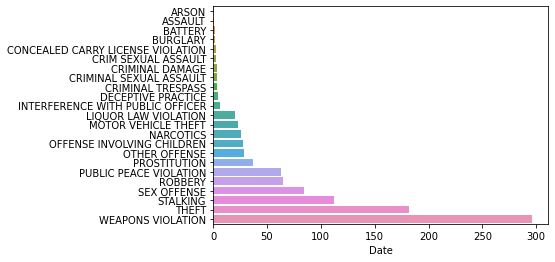

In [59]:
import seaborn as sns
ax=sns.barplot(x=stats,y=A)

# Problema 3

1. Leer el dataset country_vaccinations.csv  y filtrar los datos para Colombia
2. Crear un csv con los datos para colombia
3. Realizar una comparacion con los paises latinoamericanos. 
4. A traves de mascaras determinar el numero de vacunados en el intervalo  [1.5E6, 2.0E6]


In [66]:
path="Data/country_vaccinations.csv"
df0=pd.read_csv(path)
df0

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Zimbabwe,ZWE,2021-03-29,81610.0,69751.0,11859.0,2471.0,5434.0,0.55,0.47,0.08,366.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9572,Zimbabwe,ZWE,2021-03-30,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9573,Zimbabwe,ZWE,2021-03-31,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9574,Zimbabwe,ZWE,2021-04-01,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...


In [67]:
df0.country

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
9571       Zimbabwe
9572       Zimbabwe
9573       Zimbabwe
9574       Zimbabwe
9575       Zimbabwe
Name: country, Length: 9576, dtype: object

In [101]:
#obtener el data frame de colombia
tf = df0["country"] == "Colombia"
col=pd.DataFrame.reset_index(df0.loc[tf])
del col['index']

In [103]:
#guardarlo en csv
col.to_csv('Data/colombia.csv',index=False)

In [188]:
#lista de países a comparar
paises=['Colombia','Argentina', 'Bolivia', 'Chile', 'Venezuela', 'Mexico']
lista=[0]*6
n=0
for i in paises:
    #Crear una máscara para las filas que contengan el nomre del país
    tf = df0["country"] == "{}".format(i)
    #Crear un data frame de sólo esos datos
    j=pd.DataFrame.reset_index(df0.loc[tf])
    #Quitar el índice y agregar el df a una lista
    del j['index']
    lista[n]=j
    n+=1
lista

[     country iso_code        date  total_vaccinations  people_vaccinated  \
 0   Colombia      COL  2021-02-17                18.0                NaN   
 1   Colombia      COL  2021-02-18              9935.0                NaN   
 2   Colombia      COL  2021-02-19             21307.0                NaN   
 3   Colombia      COL  2021-02-20             33140.0                NaN   
 4   Colombia      COL  2021-02-21             39827.0                NaN   
 5   Colombia      COL  2021-02-22             45166.0                NaN   
 6   Colombia      COL  2021-02-23             48150.0                NaN   
 7   Colombia      COL  2021-02-24             50524.0                NaN   
 8   Colombia      COL  2021-02-25             66157.0                NaN   
 9   Colombia      COL  2021-02-26             81333.0                NaN   
 10  Colombia      COL  2021-02-27            114042.0                NaN   
 11  Colombia      COL  2021-02-28            130578.0                NaN   

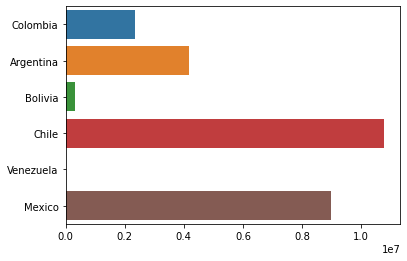

In [189]:
vacs = np.zeros(6)
n=0
for i in lista:
    #la longitud del rango menos uno, ya que empieza desde 0
    a = len(i) - 1
    #Asignar el último valor de los acumulados a un array
    vacs[n] = i.loc[a][3]
    n+=1

ax=sns.barplot(x=vacs,y=paises)

In [191]:
#Adquiero los vacunados totales sumando los diarios 
stats=df0.groupby('country').daily_vaccinations.sum().sort_values(ascending=True)
stats

country
Laos                      0.0
Brunei                  340.0
Mali                    642.0
Kosovo                  702.0
Gabon                   806.0
                     ...     
England            29708440.0
United Kingdom     35300572.0
India              67279288.0
China             115479642.0
United States     151286560.0
Name: daily_vaccinations, Length: 166, dtype: float64

In [192]:
#bool para menores de 1.5M y bool para menores de 2M
tf1 = (1.5e6<= stats) 
tf2 = stats <= 2.0e6
#intersección de ambos
tf= tf1==tf2
#Aplicar máscara a stats
stats[tf]

country
Nepal      1523512.0
Sweden     1568464.0
Austria    1625555.0
Czechia    1708587.0
Greece     1711563.0
Wales      1865778.0
Belgium    1878452.0
Name: daily_vaccinations, dtype: float64